In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [31]:
dir = r"C:/Users/tnaga/Documents/Github/Football_Transfermarkt"
os.chdir(dir)


In [45]:
df_app = pd.read_csv("./Data/appearances.csv")
df_club = pd.read_csv("./Data/clubs.csv")
df_club_game = pd.read_csv("./Data/club_games.csv")
df_comp = pd.read_csv("./Data/competitions.csv")
df_game = pd.read_csv("./Data/games.csv")
df_game_event = pd.read_csv("./Data/game_events.csv")
df_player = pd.read_csv("./Data/players.csv")
df_player_val = pd.read_csv("./Data/player_valuations.csv")

### Appearances

In [4]:
df_app.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2483937_52453,2483937,52453,28095,28095,2014-08-08,Haris Handzic,RU1,0,0,0,0,90
1,2479929_67064,2479929,67064,28095,4128,2014-08-03,Felicio Brown Forbes,RU1,0,0,0,0,90
2,2483937_67064,2483937,67064,28095,4128,2014-08-08,Felicio Brown Forbes,RU1,0,0,0,0,90
3,2484582_67064,2484582,67064,28095,4128,2014-08-13,Felicio Brown Forbes,RU1,0,0,0,0,55
4,2485965_67064,2485965,67064,28095,4128,2014-08-16,Felicio Brown Forbes,RU1,0,0,0,0,90


In [5]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049585 entries, 0 to 1049584
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1049585 non-null  object
 1   game_id                 1049585 non-null  int64 
 2   player_id               1049585 non-null  int64 
 3   player_club_id          1049585 non-null  int64 
 4   player_current_club_id  1049585 non-null  int64 
 5   date                    1037678 non-null  object
 6   player_name             1049356 non-null  object
 7   competition_id          1049585 non-null  object
 8   yellow_cards            1049585 non-null  int64 
 9   red_cards               1049585 non-null  int64 
 10  goals                   1049585 non-null  int64 
 11  assists                 1049585 non-null  int64 
 12  minutes_played          1049585 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 104.1+ MB


In [6]:
df_app.describe()

,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.049585e+06,1.049585e+06,1.049585e+06,1.049585e+06,1.049585e+06,1.049585e+06,1.049585e+06,1.049585e+06,1.049585e+06
mean,3.011869e+06,1.746783e+05,2.789166e+03,3.276530e+03,1.498554e-01,3.589038e-03,9.730703e-02,7.384442e-02,7.024827e+01
std,3.790156e+05,1.430548e+05,6.516378e+03,8.051348e+03,3.683817e-01,5.980100e-02,3.341318e-01,2.822423e-01,2.955900e+01
min,-1.000000e+00,1.000000e+01,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.668504e+06,5.887400e+04,2.810000e+02,3.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+01
50%,2.995837e+06,1.344250e+05,8.620000e+02,8.730000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,3.394722e+06,2.557480e+05,2.441000e+03,2.578000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
max,3.818416e+06,9.877000e+05,7.563500e+04,6.182500e+04,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.200000e+02


In [7]:
df_app.isna().sum()

appearance_id                 0
game_id                       0
player_id                     0
player_club_id                0
player_current_club_id        0
date                      11907
player_name                 229
competition_id                0
yellow_cards                  0
red_cards                     0
goals                         0
assists                       0
minutes_played                0
dtype: int64

In [8]:
df_app = df_app.drop(columns=["player_club_id", "player_current_club_id"])

C:\Users\tnaga\AppData\Local\Temp\ipykernel_15680\288813614.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_app.corr(), annot=True)


<AxesSubplot: >

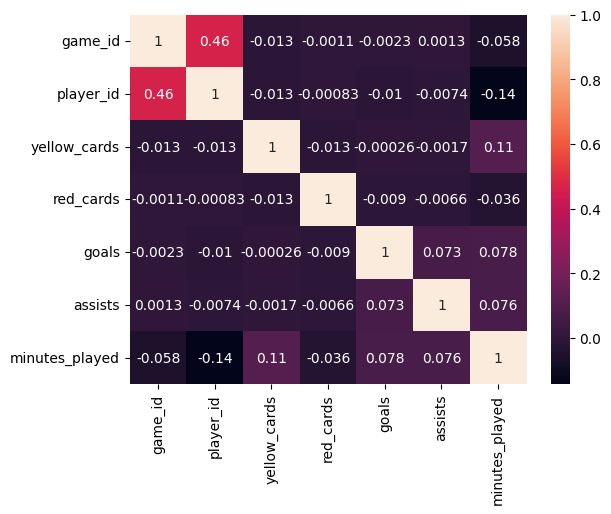

In [9]:
sns.heatmap(df_app.corr(), annot=True)

#### Aggregations in Appearences

In [10]:
df_app.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played'],
      dtype='object')

In [11]:
df_player_apps = df_app.groupby(by=["player_id", "player_name"]).agg(
    {'yellow_cards':['sum', 'mean'], 
     'red_cards': ['sum','mean'], 
     'goals':['sum', 'mean'], 
     'assists': ['sum','mean'],
     'minutes_played': 'mean',
     'player_id': 'count'
     }
).reset_index()

In [12]:
df_player_apps.columns = [f"{df_player_apps.columns.values[i][0]}_{df_player_apps.columns.values[i][1]}" for i in range(len(df_player_apps.columns))]

In [13]:
df_player_apps.head()

,player_id_,player_name_,yellow_cards_sum,yellow_cards_mean,red_cards_sum,red_cards_mean,goals_sum,goals_mean,assists_sum,assists_mean,minutes_played_mean,player_id_count
0,10,Miroslav Klose,9,0.126761,0,0.000000,24,0.338028,16,0.225352,56.380282,71
1,26,Roman Weidenfeller,1,0.016667,0,0.000000,0,0.000000,0,0.000000,87.533333,60
2,65,Dimitar Berbatov,6,0.105263,1,0.017544,13,0.228070,2,0.035088,60.070175,57
3,80,Tom Starke,0,0.000000,0,0.000000,0,0.000000,0,0.000000,90.000000,5
4,132,Tomas Rosicky,2,0.080000,0,0.000000,3,0.120000,2,0.080000,37.640000,25


In [14]:
df_player_apps.describe()

,player_id_,yellow_cards_sum,yellow_cards_mean,red_cards_sum,red_cards_mean,goals_sum,goals_mean,assists_sum,assists_mean,minutes_played_mean,player_id_count
count,17899.000000,17899.000000,17899.000000,17899.000000,17899.000000,17899.00000,17899.000000,17899.000000,17899.000000,17899.000000,17899.000000
mean,240921.897424,8.785798,0.135617,0.210403,0.003662,5.70490,0.064108,4.330018,0.049129,60.665060,58.626515
std,187574.054528,12.298906,0.138198,0.538579,0.020824,14.29926,0.101272,9.131609,0.072208,23.515119,68.034070
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,76962.500000,1.000000,0.028571,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,45.773504,9.000000
50%,203418.000000,4.000000,0.117021,0.000000,0.000000,1.00000,0.024845,1.000000,0.023810,65.320988,32.000000
75%,355481.000000,12.000000,0.200000,0.000000,0.000000,5.00000,0.090909,4.000000,0.077778,79.500000,84.000000
max,987700.000000,106.000000,2.000000,6.000000,1.000000,344.00000,1.500000,172.000000,2.000000,120.000000,406.000000


In [15]:
df_player_apps.corr()

C:\Users\tnaga\AppData\Local\Temp\ipykernel_15680\1065966716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_player_apps.corr()


,player_id_,yellow_cards_sum,yellow_cards_mean,red_cards_sum,red_cards_mean,goals_sum,goals_mean,assists_sum,assists_mean,minutes_played_mean,player_id_count
player_id_,1.000000,-0.270018,-0.090790,-0.141995,-0.018087,-0.151636,-0.072351,-0.177729,-0.090232,-0.348477,-0.304321
yellow_cards_sum,-0.270018,1.000000,0.332048,0.443766,0.018388,0.418726,0.162075,0.545125,0.205430,0.343398,0.819398
yellow_cards_mean,-0.090790,0.332048,1.000000,0.112163,0.018223,-0.004343,-0.005037,0.021271,0.008256,0.244235,0.088817
red_cards_sum,-0.141995,0.443766,0.112163,1.000000,0.347449,0.200100,0.073567,0.231495,0.073190,0.207639,0.405756
red_cards_mean,-0.018087,0.018388,0.018223,0.347449,1.000000,-0.011386,-0.022110,-0.014058,-0.016491,0.051791,-0.003024
goals_sum,-0.151636,0.418726,-0.004343,0.200100,-0.011386,1.000000,0.617885,0.762654,0.352600,0.105085,0.623332
goals_mean,-0.072351,0.162075,-0.005037,0.073567,-0.022110,0.617885,1.000000,0.396586,0.315321,0.025851,0.282522
assists_sum,-0.177729,0.545125,0.021271,0.231495,-0.014058,0.762654,0.396586,1.000000,0.537877,0.158832,0.731871
assists_mean,-0.090232,0.205430,0.008256,0.073190,-0.016491,0.352600,0.315321,0.537877,1.000000,0.077880,0.295123
minutes_played_mean,-0.348477,0.343398,0.244235,0.207639,0.051791,0.105085,0.025851,0.158832,0.077880,1.000000,0.351338


C:\Users\tnaga\AppData\Local\Temp\ipykernel_15680\2059050447.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_player_apps.corr(), annot=True)


<AxesSubplot: >

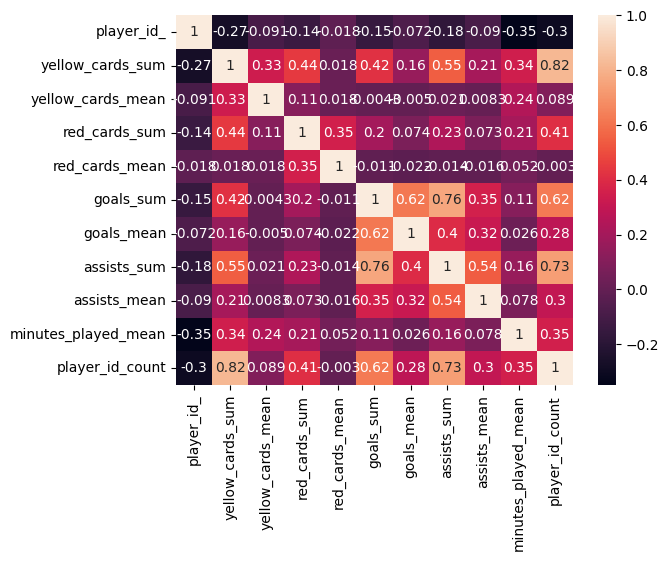

In [16]:
sns.heatmap(df_player_apps.corr(), annot=True)

In [17]:
df_player_apps.sort_values(["goals_sum"], ascending=False)

,player_id_,player_name_,yellow_cards_sum,yellow_cards_mean,red_cards_sum,red_cards_mean,goals_sum,goals_mean,assists_sum,assists_mean,minutes_played_mean,player_id_count
2020,38253,Robert Lewandowski,36,0.096000,0,0.000000,344,0.917333,70,0.186667,84.610667,375
1387,28003,Lionel Messi,44,0.113990,1,0.002591,329,0.852332,172,0.445596,85.544041,386
378,8198,Cristiano Ronaldo,41,0.112637,2,0.005495,323,0.887363,82,0.225275,86.365385,364
6653,132098,Harry Kane,37,0.103933,0,0.000000,239,0.671348,54,0.151685,81.924157,356
3468,58864,Pierre-Emerick Aubameyang,24,0.068376,1,0.002849,230,0.655271,51,0.145299,80.404558,351
...,...,...,...,...,...,...,...,...,...,...,...,...
2132,39913,Ludovic Baal,6,0.050000,2,0.016667,0,0.000000,12,0.100000,77.025000,120
10696,260668,Danila Buranov,0,0.000000,0,0.000000,0,0.000000,0,0.000000,29.000000,2
10698,260677,Anton Mitryushkin,0,0.000000,0,0.000000,0,0.000000,0,0.000000,90.000000,1
2130,39910,Stéphane Ruffier,9,0.038627,2,0.008584,0,0.000000,0,0.000000,89.776824,233


In [18]:
df_player_apps.sort_values(["goals_mean"], ascending=False)

,player_id_,player_name_,yellow_cards_sum,yellow_cards_mean,red_cards_sum,red_cards_mean,goals_sum,goals_mean,assists_sum,assists_mean,minutes_played_mean,player_id_count
15201,449496,Álvaro Aguado,1,0.5000,0,0.0,3,1.5,0,0.00000,64.50000,2
10507,255888,Roberto Núñez,0,0.0000,0,0.0,1,1.0,0,0.00000,31.00000,1
10801,263941,Ilmir Nurisov,0,0.0000,0,0.0,1,1.0,0,0.00000,90.00000,1
16665,566036,Borja Garcés,0,0.0000,0,0.0,1,1.0,0,0.00000,19.00000,1
10375,251107,Furkan Ünver,0,0.0000,0,0.0,1,1.0,0,0.00000,90.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9510,222571,Ramiro Guerra,2,0.2000,0,0.0,0,0.0,0,0.00000,46.90000,10
9511,222608,Hasan Ayaroglu,2,0.0625,0,0.0,0,0.0,1,0.03125,23.46875,32
9512,222636,Florian Escales,0,0.0000,0,0.0,0,0.0,0,0.00000,90.00000,1
9519,222838,Miladin Stevanovic,0,0.0000,0,0.0,0,0.0,0,0.00000,63.00000,2


In [19]:
df_player_apps.sort_values(["player_id_count"], ascending=False)

,player_id_,player_name_,yellow_cards_sum,yellow_cards_mean,red_cards_sum,red_cards_mean,goals_sum,goals_mean,assists_sum,assists_mean,minutes_played_mean,player_id_count
1603,32467,Ivan Rakitic,51,0.125616,0,0.000000,50,0.123153,53,0.130542,67.933498,406
3908,65230,Sergio Busquets,98,0.247475,0,0.000000,7,0.017677,25,0.063131,79.919192,396
6320,125781,Antoine Griezmann,48,0.121519,2,0.005063,176,0.445570,72,0.182278,76.531646,395
6708,134425,Raheem Sterling,46,0.117647,0,0.000000,143,0.365729,94,0.240409,75.644501,391
1387,28003,Lionel Messi,44,0.113990,1,0.002591,329,0.852332,172,0.445596,85.544041,386
...,...,...,...,...,...,...,...,...,...,...,...,...
14126,389030,Anatoliy Anisimov,0,0.000000,0,0.000000,0,0.000000,0,0.000000,40.000000,1
16735,571140,Luis Hartwig,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1.000000,1
14128,389441,Virgile Pinson,0,0.000000,0,0.000000,0,0.000000,0,0.000000,4.000000,1
14130,389581,Eyob Zambataro,0,0.000000,0,0.000000,0,0.000000,0,0.000000,90.000000,1


In [20]:
# plot values of player statistics for players who have played at least 20 games
df_player_apps = df_player_apps[df_player_apps["player_id_count"] > 10]

[Text(0, 0, 'Erling Haaland'),
 Text(1, 0, 'Robert Lewandowski'),
 Text(2, 0, 'Cristiano Ronaldo'),
 Text(3, 0, 'Lionel Messi'),
 Text(4, 0, 'Deniz Undav'),
 Text(5, 0, 'Jonas'),
 Text(6, 0, 'Kylian Mbappé'),
 Text(7, 0, 'Sergio Agüero'),
 Text(8, 0, 'Cleiton Xavier'),
 Text(9, 0, 'Harry Kane'),
 Text(10, 0, 'Neymar'),
 Text(11, 0, 'Pierre-Emerick Aubameyang'),
 Text(12, 0, 'Ruud Boymans'),
 Text(13, 0, 'Zlatan Ibrahimović'),
 Text(14, 0, 'Aleksandar Prijovic'),
 Text(15, 0, 'Ciro Immobile'),
 Text(16, 0, 'Luis Suárez'),
 Text(17, 0, 'Kane Hemmings'),
 Text(18, 0, 'Carlos Tevez'),
 Text(19, 0, 'Edinson Cavani')]

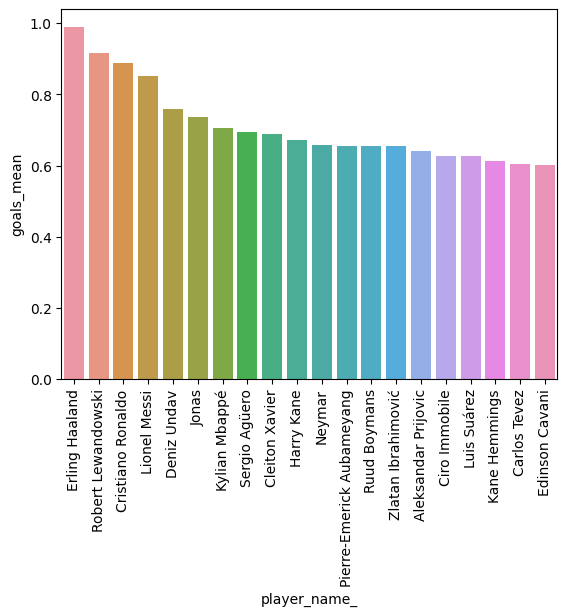

In [21]:
df_player_apps_goals = df_player_apps.sort_values(by="goals_mean", ascending=False)
df_player_apps_goals_sub = df_player_apps_goals.iloc[:20,:]
bar_goals = sns.barplot(df_player_apps_goals_sub, x="player_name_", y="goals_mean")
bar_goals.set_xticklabels(bar_goals.get_xticklabels(), rotation=90)

[Text(0, 0, 'Robert Lewandowski'),
 Text(1, 0, 'Lionel Messi'),
 Text(2, 0, 'Cristiano Ronaldo'),
 Text(3, 0, 'Harry Kane'),
 Text(4, 0, 'Pierre-Emerick Aubameyang'),
 Text(5, 0, 'Luis Suárez'),
 Text(6, 0, 'Karim Benzema'),
 Text(7, 0, 'Ciro Immobile'),
 Text(8, 0, 'Mohamed Salah'),
 Text(9, 0, 'Romelu Lukaku'),
 Text(10, 0, 'Sergio Agüero'),
 Text(11, 0, 'Neymar'),
 Text(12, 0, 'Antoine Griezmann'),
 Text(13, 0, 'Kylian Mbappé'),
 Text(14, 0, 'Edinson Cavani'),
 Text(15, 0, 'Wissam Ben Yedder'),
 Text(16, 0, 'Alexandre Lacazette'),
 Text(17, 0, 'Bas Dost'),
 Text(18, 0, 'Heung-min Son'),
 Text(19, 0, 'Gonzalo Higuaín')]

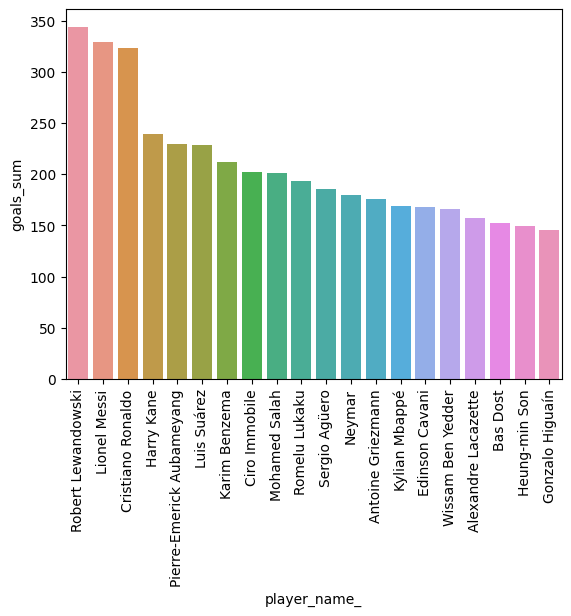

In [22]:
df_player_apps_goalsum = df_player_apps.sort_values(by="goals_sum", ascending=False)
df_player_apps_goalsum_sub = df_player_apps_goalsum.iloc[:20,:]
bar_goals = sns.barplot(df_player_apps_goalsum_sub, x="player_name_", y="goals_sum")
bar_goals.set_xticklabels(bar_goals.get_xticklabels(), rotation=90)

[Text(0, 0, 'Aleksandr Chernikov'),
 Text(1, 0, 'Stefan Jevtoski'),
 Text(2, 0, 'Fernando Amorebieta'),
 Text(3, 0, 'Daniele Conti'),
 Text(4, 0, 'Bernard Tekpetey'),
 Text(5, 0, 'Klaus Gjasula'),
 Text(6, 0, 'Adrián Diéguez'),
 Text(7, 0, 'Maroine Mihoubi'),
 Text(8, 0, 'Matías Sánchez'),
 Text(9, 0, 'Andrea Coda'),
 Text(10, 0, 'Mohamadou Sissoko'),
 Text(11, 0, 'Artem Filimonov'),
 Text(12, 0, 'Fatjon Andoni'),
 Text(13, 0, 'Joaquim Adão'),
 Text(14, 0, 'Nazariy Muravskyi'),
 Text(15, 0, 'Aljaz Struna'),
 Text(16, 0, 'Tiago Almeida'),
 Text(17, 0, 'Saleh Gomaa'),
 Text(18, 0, 'Edin Sehic'),
 Text(19, 0, 'Santiago Colombatto')]

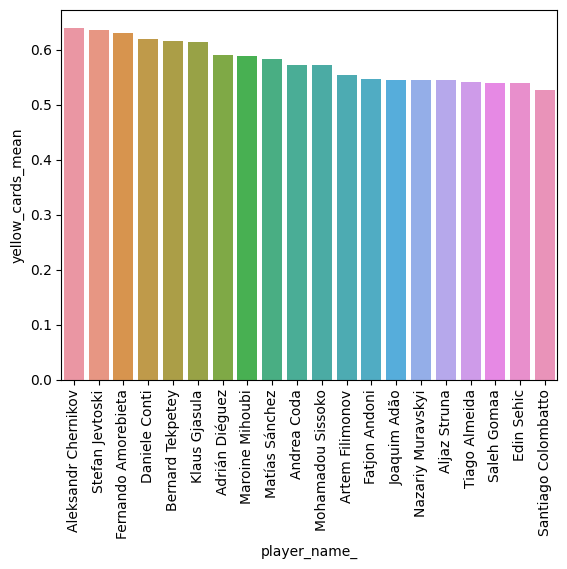

In [23]:
df_player_apps_yellow = df_player_apps.sort_values(by="yellow_cards_mean", ascending=False)
df_player_apps_yellow_sub = df_player_apps_yellow.iloc[:20,:]
bar_yellow = sns.barplot(df_player_apps_yellow_sub, x="player_name_", y="yellow_cards_mean")
bar_yellow.set_xticklabels(bar_yellow.get_xticklabels(), rotation=90)

[Text(0, 0, 'Casemiro'),
 Text(1, 0, 'Dani García'),
 Text(2, 0, 'Raúl García'),
 Text(3, 0, 'Sergio Busquets'),
 Text(4, 0, 'Damián Suárez'),
 Text(5, 0, 'Granit Xhaka'),
 Text(6, 0, 'Álvaro González'),
 Text(7, 0, 'Sergio Ramos'),
 Text(8, 0, 'Daniel Carvajal'),
 Text(9, 0, 'Gerard Piqué'),
 Text(10, 0, 'Marco Verratti'),
 Text(11, 0, 'Dominik Kohr'),
 Text(12, 0, 'Kalidou Koulibaly'),
 Text(13, 0, 'Marten de Roon'),
 Text(14, 0, 'Marcelo Brozovic'),
 Text(15, 0, 'Iñigo Martínez'),
 Text(16, 0, 'Fernandinho'),
 Text(17, 0, 'Dani Parejo'),
 Text(18, 0, 'Domenico Criscito'),
 Text(19, 0, 'Éver Banega')]

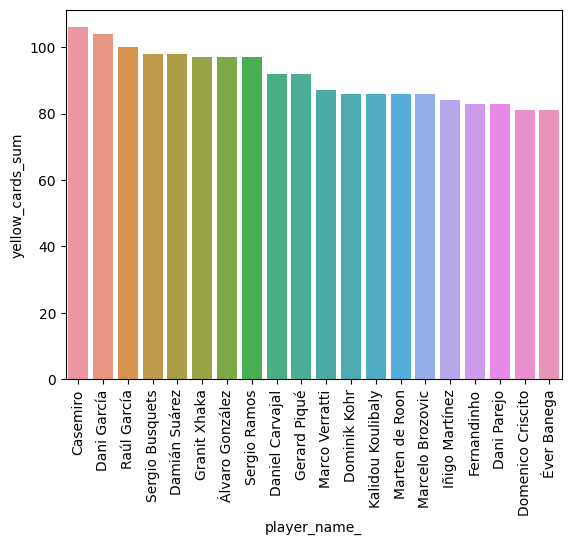

In [24]:
df_player_apps_yellowsum = df_player_apps.sort_values(by="yellow_cards_sum", ascending=False)
df_player_apps_yellowsum_sub = df_player_apps_yellowsum.iloc[:20,:]
bar_yellow = sns.barplot(df_player_apps_yellowsum_sub, x="player_name_", y="yellow_cards_sum")
bar_yellow.set_xticklabels(bar_yellow.get_xticklabels(), rotation=90)

[Text(0, 0, 'Tony'),
 Text(1, 0, 'Fejsal Mulic'),
 Text(2, 0, 'Vitaliy Dakhnovskyi'),
 Text(3, 0, 'Christophe Diedhiou'),
 Text(4, 0, 'Ricardo Batista'),
 Text(5, 0, 'Jamie Hamilton'),
 Text(6, 0, 'João Amorim'),
 Text(7, 0, 'Tiago Valente'),
 Text(8, 0, 'Josef Sural'),
 Text(9, 0, 'Mehmet Topuz'),
 Text(10, 0, "Ismaïla N'Diaye"),
 Text(11, 0, 'Bruno Fuchs'),
 Text(12, 0, 'Fabian Ehmann'),
 Text(13, 0, 'Florian Hartherz'),
 Text(14, 0, 'Daniel Kolar'),
 Text(15, 0, 'Dimitrios Tairis'),
 Text(16, 0, 'Gustavo Dulanto'),
 Text(17, 0, 'Tugay Kacar'),
 Text(18, 0, 'Robert Tesche'),
 Text(19, 0, 'Nicolas Saint-Ruf')]

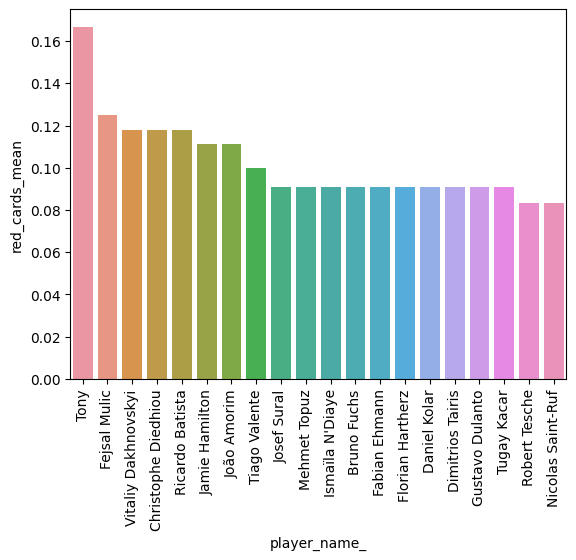

In [25]:
df_player_apps_red = df_player_apps.sort_values(by="red_cards_mean", ascending=False)
df_player_apps_red_sub = df_player_apps_red.iloc[:20,:]
bar_red = sns.barplot(df_player_apps_red_sub, x="player_name_", y="red_cards_mean")
bar_red.set_xticklabels(bar_red.get_xticklabels(), rotation=90)

[Text(0, 0, 'Mario Balotelli'),
 Text(1, 0, 'Granit Xhaka'),
 Text(2, 0, 'Thomas Lam'),
 Text(3, 0, 'Domenico Berardi'),
 Text(4, 0, 'Hilton'),
 Text(5, 0, 'Stefan Mitrović'),
 Text(6, 0, 'Damien Da Silva'),
 Text(7, 0, 'Jaume Costa'),
 Text(8, 0, 'Ante Rebic'),
 Text(9, 0, 'Birger Verstraete'),
 Text(10, 0, 'Jordi Amat'),
 Text(11, 0, 'Yannick Cahuzac'),
 Text(12, 0, 'Roberto Soriano'),
 Text(13, 0, 'Allan Nyom'),
 Text(14, 0, 'Ognjen Vranjes'),
 Text(15, 0, 'Rafik Halliche'),
 Text(16, 0, 'Ivan Ordets'),
 Text(17, 0, 'Adis Jahovic'),
 Text(18, 0, 'David Luiz'),
 Text(19, 0, 'Kalidou Koulibaly')]

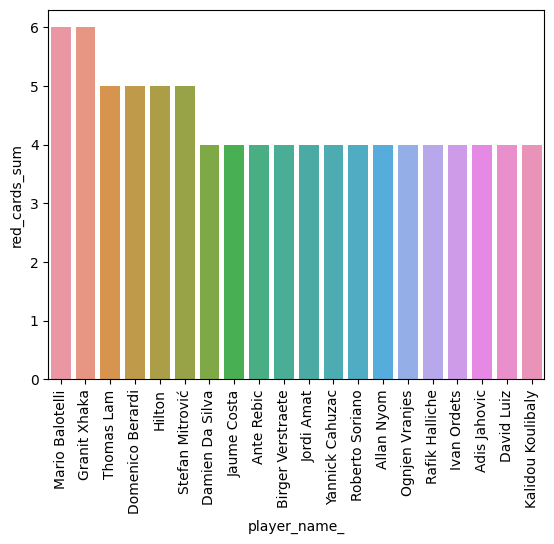

In [26]:
df_player_apps_redsum = df_player_apps.sort_values(by="red_cards_sum", ascending=False)
df_player_apps_redsum_sub = df_player_apps_redsum.iloc[:20,:]
bar_red = sns.barplot(df_player_apps_redsum_sub, x="player_name_", y="red_cards_sum")
bar_red.set_xticklabels(bar_red.get_xticklabels(), rotation=90)

[Text(0, 0, 'Mario Balotelli'),
 Text(1, 0, 'Granit Xhaka'),
 Text(2, 0, 'Thomas Lam'),
 Text(3, 0, 'Domenico Berardi'),
 Text(4, 0, 'Hilton'),
 Text(5, 0, 'Stefan Mitrović'),
 Text(6, 0, 'Damien Da Silva'),
 Text(7, 0, 'Jaume Costa'),
 Text(8, 0, 'Ante Rebic'),
 Text(9, 0, 'Birger Verstraete'),
 Text(10, 0, 'Jordi Amat'),
 Text(11, 0, 'Yannick Cahuzac'),
 Text(12, 0, 'Roberto Soriano'),
 Text(13, 0, 'Allan Nyom'),
 Text(14, 0, 'Ognjen Vranjes'),
 Text(15, 0, 'Rafik Halliche'),
 Text(16, 0, 'Ivan Ordets'),
 Text(17, 0, 'Adis Jahovic'),
 Text(18, 0, 'David Luiz'),
 Text(19, 0, 'Kalidou Koulibaly')]

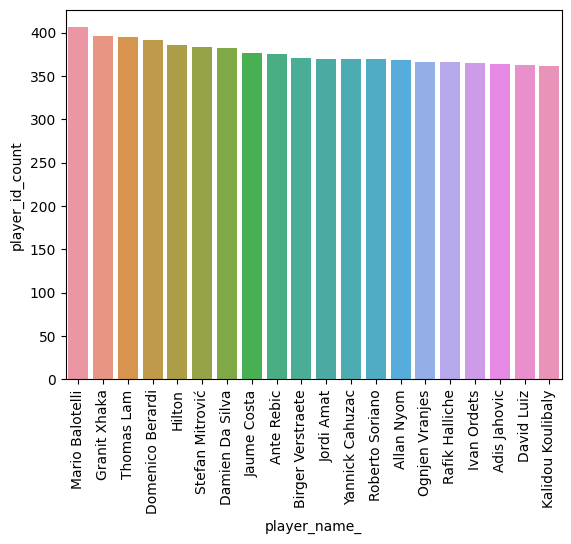

In [27]:
df_player_apps_sum = df_player_apps.sort_values(by="player_id_count", ascending=False)
df_player_apps_sum_sub = df_player_apps_sum.iloc[:20,:]
bar_sum = sns.barplot(df_player_apps_sum_sub, x="player_name_", y="player_id_count")
bar_sum.set_xticklabels(bar_red.get_xticklabels(), rotation=90)

### Clubs        

In [33]:
df_club.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,url
0,1032,fc-reading,Fc Reading,GB1,33.66,26,25.9,12,46.2,6,Select Car Leasing Stadium,24161,+£8.37m,Brian McDermott,https://www.transfermarkt.co.uk/fc-reading/sta...
1,2323,orduspor,Orduspor,TR1,NaN,0,NaN,0,NaN,0,19 Eylül Stadyum,11024,+-0,Héctor Cúper,https://www.transfermarkt.co.uk/orduspor/start...
2,1387,acn-siena-1904,Acn Siena 1904,IT1,4.32,30,26.2,6,20.0,2,Artemio Franchi,15373,£-6Th.,Serse Cosmi,https://www.transfermarkt.co.uk/acn-siena-1904...
3,3592,kryvbas-kryvyi-rig,Kryvbas Kryvyi Rig,UKR1,2.95,24,24.5,2,8.3,0,Shakhty Zhovtneva,2500,£-270Th.,Oleg Taran,https://www.transfermarkt.co.uk/kryvbas-kryvyi...
4,1071,wigan-athletic,Wigan Athletic,GB1,12.38,29,26.5,14,48.3,6,DW Stadium,25133,£-140Th.,Roberto Martínez,https://www.transfermarkt.co.uk/wigan-athletic...


In [34]:
df_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  401 non-null    int64  
 1   club_code                401 non-null    object 
 2   name                     401 non-null    object 
 3   domestic_competition_id  401 non-null    object 
 4   total_market_value       354 non-null    float64
 5   squad_size               401 non-null    int64  
 6   average_age              372 non-null    float64
 7   foreigners_number        401 non-null    int64  
 8   foreigners_percentage    357 non-null    float64
 9   national_team_players    401 non-null    int64  
 10  stadium_name             401 non-null    object 
 11  stadium_seats            401 non-null    int64  
 12  net_transfer_record      401 non-null    object 
 13  coach_name               401 non-null    object 
 14  url                      4

In [35]:
df_club.describe()

,club_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats
count,401.000000,354.000000,401.000000,372.000000,401.000000,357.000000,401.000000,401.000000
mean,4701.932668,91.076130,24.835411,25.605914,10.855362,44.384314,4.917706,25561.037406
std,10244.630906,147.552651,8.200783,1.621027,6.604470,19.177255,5.088292,17913.698519
min,3.000000,1.100000,0.000000,20.000000,0.000000,3.800000,0.000000,1600.000000
25%,410.000000,9.685000,24.000000,24.600000,6.000000,29.200000,1.000000,12080.000000
50%,1108.000000,26.675000,27.000000,25.600000,11.000000,44.800000,3.000000,20560.000000
75%,3368.000000,95.460000,29.000000,26.700000,16.000000,57.700000,8.000000,33280.000000
max,68608.000000,832.320000,40.000000,30.200000,29.000000,100.000000,20.000000,99354.000000


In [36]:
df_club.corr()

C:\Users\tnaga\AppData\Local\Temp\ipykernel_15680\1119422815.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_club.corr()


,club_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats
club_id,1.000000,-0.165396,-0.231481,0.036523,-0.288904,-0.226230,-0.265226,-0.130233
total_market_value,-0.165396,1.000000,0.077263,0.190929,0.337336,0.405469,0.736265,0.577401
squad_size,-0.231481,0.077263,1.000000,0.076245,0.623015,0.229142,0.346325,0.110176
average_age,0.036523,0.190929,0.076245,1.000000,0.186006,0.154871,0.242455,0.213829
foreigners_number,-0.288904,0.337336,0.623015,0.186006,1.000000,0.953609,0.660028,0.235681
foreigners_percentage,-0.226230,0.405469,0.229142,0.154871,0.953609,1.000000,0.626135,0.240548
national_team_players,-0.265226,0.736265,0.346325,0.242455,0.660028,0.626135,1.000000,0.596094
stadium_seats,-0.130233,0.577401,0.110176,0.213829,0.235681,0.240548,0.596094,1.000000


C:\Users\tnaga\AppData\Local\Temp\ipykernel_15680\2453978102.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_club.corr(), annot=True)


<AxesSubplot: >

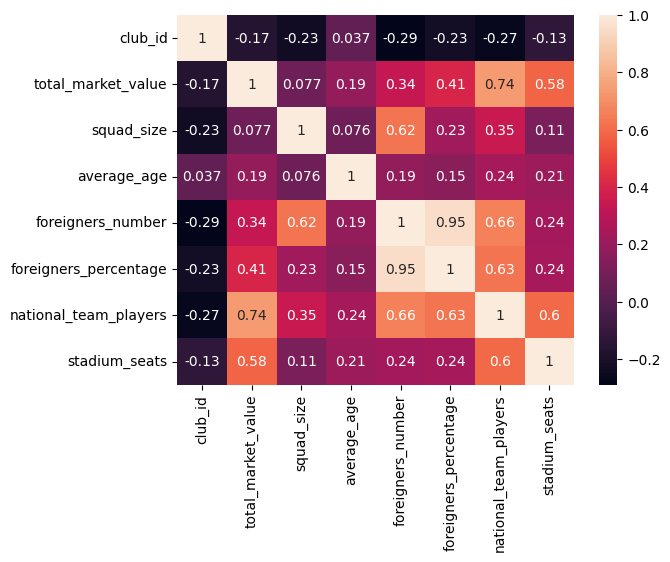

In [37]:
sns.heatmap(df_club.corr(), annot=True)

#### See the top club market values

In [46]:
df_club["Adjusted Market Value"] = df_club["total_market_value"] / df_club["squad_size"]

In [49]:
df_club = df_club.sort_values("Adjusted Market Value", ascending=False)

In [50]:
df_club.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,url,Adjusted Market Value
275,281,manchester-city,Manchester City,GB1,832.32,22,27.8,15,68.2,18,Etihad Stadium,55017,£-36.63m,Pep Guardiola,https://www.transfermarkt.co.uk/manchester-cit...,37.832727
311,27,fc-bayern-munchen,Fc Bayern Munchen,L1,692.55,26,25.9,15,57.7,20,Allianz Arena,75024,£-48.15m,Julian Nagelsmann,https://www.transfermarkt.co.uk/fc-bayern-munc...,26.636538
39,3558,gfc-ajaccio,Gfc Ajaccio,FR1,585.00,22,23.9,2,9.1,0,Stade Ange-Casanova,4050,+-0,Thierry Laurey,https://www.transfermarkt.co.uk/gfc-ajaccio/st...,26.590909
296,418,real-madrid,Real Madrid,ES1,675.00,26,27.5,18,69.2,15,Santiago Bernabéu,81044,+£42.30m,Carlo Ancelotti,https://www.transfermarkt.co.uk/real-madrid/st...,25.961538
293,13,atletico-madrid,Atletico Madrid,ES1,547.20,22,28.7,19,86.4,19,Wanda Metropolitano,68456,£-47.66m,Diego Simeone,https://www.transfermarkt.co.uk/atletico-madri...,24.872727


[Text(0, 0, 'Manchester City'),
 Text(1, 0, 'Fc Bayern Munchen'),
 Text(2, 0, 'Gfc Ajaccio'),
 Text(3, 0, 'Real Madrid'),
 Text(4, 0, 'Atletico Madrid'),
 Text(5, 0, 'Fc Liverpool'),
 Text(6, 0, 'Fc Chelsea'),
 Text(7, 0, 'Fc Arsenal'),
 Text(8, 0, 'Tottenham Hotspur'),
 Text(9, 0, 'Fc Paris Saint Germain'),
 Text(10, 0, 'Fc Barcelona'),
 Text(11, 0, 'Inter Mailand'),
 Text(12, 0, 'Manchester United'),
 Text(13, 0, 'Juventus Turin'),
 Text(14, 0, 'Ac Mailand'),
 Text(15, 0, 'Ssc Neapel'),
 Text(16, 0, 'Leicester City'),
 Text(17, 0, 'Rasenballsport Leipzig'),
 Text(18, 0, 'Bayer 04 Leverkusen'),
 Text(19, 0, 'Aston Villa'),
 Text(20, 0, 'Borussia Dortmund'),
 Text(21, 0, 'Elazigspor'),
 Text(22, 0, 'Fc Villarreal'),
 Text(23, 0, 'Fc Everton'),
 Text(24, 0, 'Fc Sevilla'),
 Text(25, 0, 'Atalanta Bergamo'),
 Text(26, 0, 'West Ham United'),
 Text(27, 0, 'As Monaco'),
 Text(28, 0, 'Real Sociedad San Sebastian'),
 Text(29, 0, 'As Rom')]

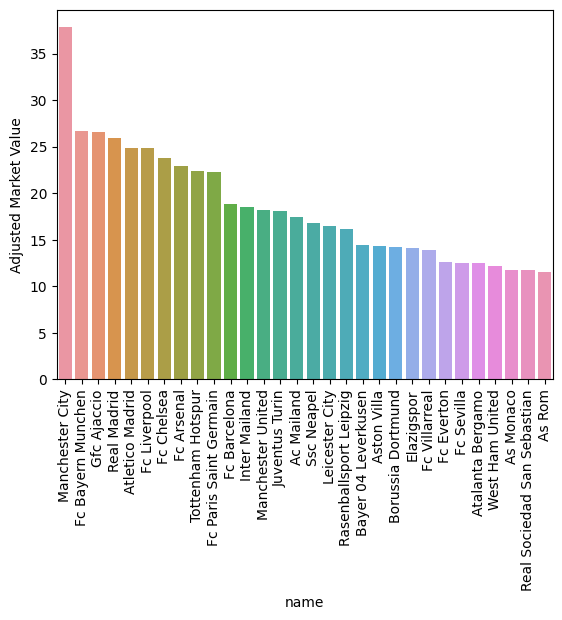

In [63]:
df_club_sub = df_club.iloc[:30,:]
bar_club = sns.barplot(df_club_sub, x="name", y="Adjusted Market Value")
bar_club.set_xticklabels(bar_club.get_xticklabels(), rotation=90)

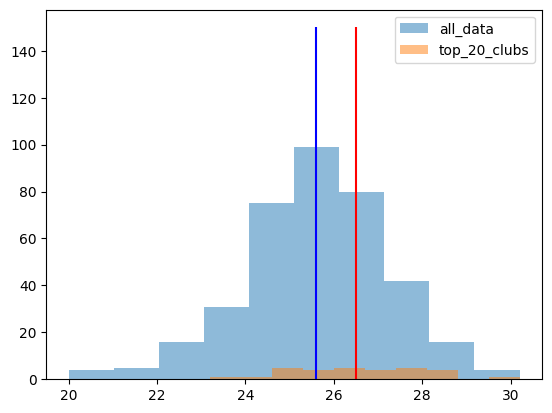

In [64]:
pyplot.hist(df_club["average_age"], alpha=0.5, label='all_data')
pyplot.hist(df_club_sub["average_age"], alpha=0.5, label='top_20_clubs')
pyplot.vlines(x=df_club["average_age"].mean(), ymin=0, ymax=150, colors="blue")
pyplot.vlines(x=df_club_sub["average_age"].mean(), ymin=0, ymax=150, colors="red")
pyplot.legend(loc='upper right')
pyplot.show()

In [66]:
print(f"The average age of all clubs is {df_club['average_age'].mean()}")
print(f"The average age of the top 30 clubs by market value is {df_club_sub['average_age'].mean()}")

The average age of all clubs is 25.605913978494623
The average age of the top 30 clubs by market value is 26.496666666666666


In [ ]:
sns.distplot(df_club["average_age"])

C:\Users\tnaga\AppData\Local\Temp\ipykernel_15680\967636276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_club["Adjusted Market Value"])


<AxesSubplot: xlabel='Adjusted Market Value', ylabel='Density'>

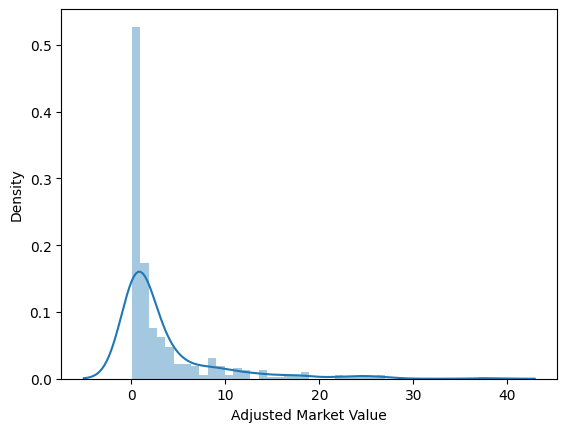

In [51]:
sns.distplot(df_club["Adjusted Market Value"])

In [101]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer, InterclusterDistance

In [133]:
df_club.columns

Index(['club_id', 'club_code', 'name', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name',
       'stadium_seats', 'net_transfer_record', 'coach_name', 'url',
       'Adjusted Market Value'],
      dtype='object')

In [154]:
X = df_club[['squad_size', 'average_age', 'foreigners_number','foreigners_percentage', 'national_team_players',
       'stadium_seats']]

y = pd.Series(["Top" if club in df_club_sub["name"].to_list() else "No" for club in df_club["name"].to_list()], name="Top_Club")

In [155]:
std_scl = StandardScaler()
X_std = std_scl.fit_transform(X)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_std = imp_mean.fit_transform(X_std)

pca = PCA(n_components=(len(X_std[0]) - 1))
X_pca = pca.fit_transform(X_std)

<AxesSubplot: >

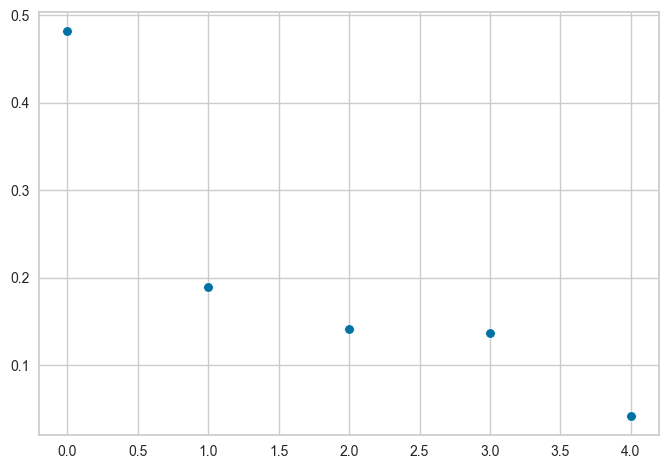

In [156]:
sns.scatterplot(x=range(0,len(X_std[0]) - 1),y=pca.explained_variance_ratio_)

In [157]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

c:\Users\tnaga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\tnaga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\tnaga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\tnaga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

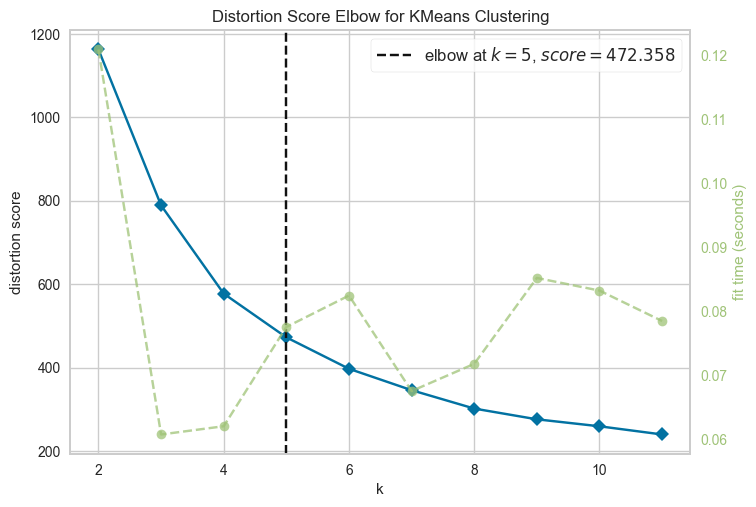

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [158]:
km = KMeans(random_state=5)
visualizer = KElbowVisualizer(km, k=(2,12))
visualizer.fit(X_pca)
visualizer.show()

c:\Users\tnaga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\tnaga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



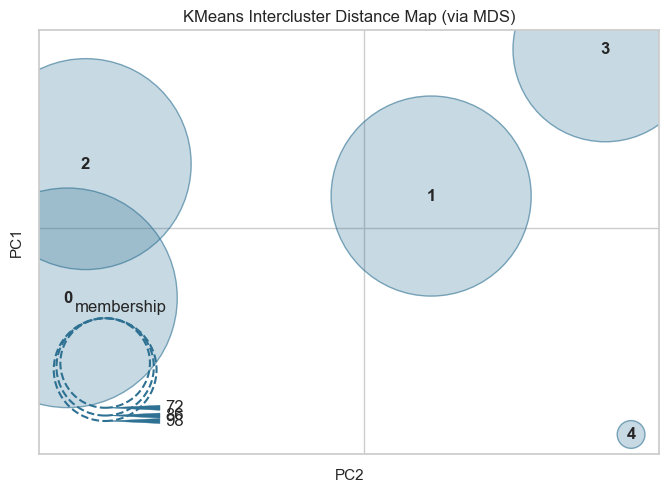

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [159]:
interclusterdist = InterclusterDistance(KMeans(5, random_state=42))

interclusterdist.fit(X_pca)        # Fit the data to the visualizer
interclusterdist.show() 

In [160]:
df_pca = pd.DataFrame(X_pca, columns = ["PC1", "PC2", "PC3"])
df_pca = pd.concat([df_pca, y], axis=1)

In [161]:
import plotly.express as px
fig = px.scatter_3d(df_pca, x=f"PC1", y=f"PC2", z=f"PC3", color="Top_Club")
fig.show(renderer="browser")

In [166]:
new_cols = ['squad_size', 'average_age', 'foreigners_number','foreigners_percentage', 'national_team_players',
       'stadium_seats']

In [169]:
df_pca_comp = pd.DataFrame(pca.components_, columns = new_cols, index = ["PC1", "PC2", "PC3"])

In [170]:
df_pca_comp.head()

,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats
PC1,0.332290,0.180421,0.538739,0.424458,0.524377,0.334149
PC2,-0.566715,0.453170,-0.328172,-0.019717,0.190829,0.573559
PC3,-0.626458,-0.368967,0.133318,0.628595,0.031005,-0.239889


### Club Games      

In [ ]:
df_club_game = pd.read_csv("./Data/club_games.csv")

### Competitions

In [ ]:
df_comp = pd.read_csv("./Data/competitions.csv")